# RD Method

description to be added

## Initialize

In [1]:
import sys, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BASE_PATH = './# TestModel'

INPUT_FILE_PATH = f'{BASE_PATH}/input.csv'
OUTPUT_FILE_PATH = f'{BASE_PATH}/output.csv'

## Read Input

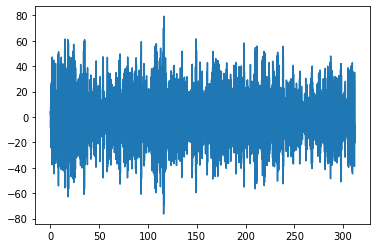

In [5]:
df = pd.read_csv(INPUT_FILE_PATH, sep=',', encoding="SHIFT-JIS")
inputHistory = np.array(df)
inputT = inputHistory[:,0]
inputV = inputHistory[:,1]
plt.plot(inputT,inputV)

## Calc RD Method

In [ ]:
# USER SETTING
RESULT_STEP_LENGTH = 200
SKIPPING_INITIAL_PEAK_COUNT = 0
MAX_OVERLAY_COUNT = sys.maxsize

In [ ]:
resultV = np.array(RESULT_STEP_LENGTH)
peakCount = 0
overlayCount = 0

# Add to resultV if peak found
for i in range(1, len(inputV) - RESULT_STEP_LENGTH - 1):

  if (MAX_OVERLAY_COUNT <= overlayCount):
    print("Successfully stopped: overlayCount count reached MAX_OVERLAY_COUNT")
    break

  lastStep = inputV[i - 1]
  currentStep = inputV[i]
  nextStep = inputV[i + 1]

  # Simple peak detection
  if (lastStep < currentStep and currentStep >= nextStep):
    
    peakCount += 1

    # Skip when in skipping state 
    if (SKIPPING_INITIAL_PEAK_COUNT >= peakCount):
      continue

    # Overlay
    overlayCount += 1
    resultV = np.add(resultV, inputV[i : i + RESULT_STEP_LENGTH])

# Print result
if (SKIPPING_INITIAL_PEAK_COUNT > 0):
  print(f"Skipped  : {peakCount - overlayCount} / {SKIPPING_INITIAL_PEAK_COUNT}")

if (MAX_OVERLAY_COUNT == sys.maxsize):
  print(f"Overlayed: {overlayCount}")
else:
  print(f"Overlayed: {overlayCount} / {MAX_OVERLAY_COUNT}")

In [ ]:
df = pd.DataFrame(zip(inputT,resultV), columns =["t", "v"])
df.to_csv(OUTPUT_FILE_PATH, index=None)
df.plot(x="t", y=["v"])

## Calc Attenuation Constant

In [ ]:
# USER SETTING
CHECK_PEAK_COUNT = 5

In [ ]:
peaks = []
attenuations = []


def AddPeak(t, v):
  print(f"Peak {len(peaks)}: t={t:.2f}, v={v:.2f}")
  peaks.append(v)

AddPeak(inputT[0], resultV[0])

# find peaks
for i in range(1, len(resultV)-1):

  if (CHECK_PEAK_COUNT <= len(peaks)):
    break

  lastStep = resultV[i - 1]
  currentStep = resultV[i]
  nextStep = resultV[i + 1]

  # Simple peak detection
  if (lastStep < currentStep and currentStep >= nextStep):
    AddPeak(inputT[i], currentStep)


# Calc attenuations
print()
for i in range(0, len(peaks)-1):
  currentPeak = peaks[i]
  nextPeak = peaks[i + 1]
  attenuation = 1 / 2 / math.pi * math.log(currentPeak / nextPeak)
  print(f"Attenuation {i}: h={attenuation:.4f}")
  attenuations.append(attenuation)


# Calc attenuation mean
print()
attenuationMean = sum(attenuations)/len(attenuations)
print(f"Attenuation mean: h={attenuationMean:.4f}")

## Done